<a href="https://colab.research.google.com/github/ggyuchive/MLpractice/blob/main/Dacon/income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
print(df_train.shape, df_test.shape)
df_train

(17480, 16) (15081, 15)


,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [6]:
df_train.drop(['id','workclass','education','marital.status','occupation','relationship','race','sex','native.country'], axis=1, inplace = True)
df_test.drop(['id','workclass','education','marital.status','occupation','relationship','race','sex','native.country'], axis=1, inplace = True)

In [7]:
X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']
print(X_train.shape, y_train.shape)

(17480, 6) (17480,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0792057c90>,
      dtype=object)

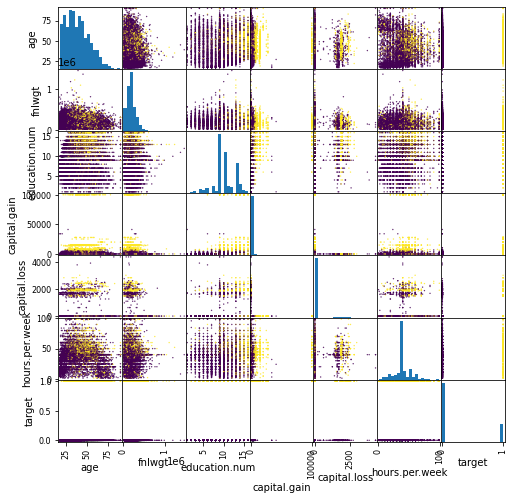

In [8]:
pd.plotting.scatter_matrix(df_train, c=y_train, figsize=(8,8), marker='o',
                           hist_kwds={'bins':20}, s=2, alpha=.8)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (
    X_train, y_train, random_state = 0
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train

(13110, 6) (4370, 6) (13110,) (4370,)


3872     0
8865     0
4725     0
15088    0
1899     0
        ..
9225     0
13123    1
9845     0
10799    1
2732     0
Name: target, Length: 13110, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.8041189931350115 0.8002288329519451


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
fr = RandomForestClassifier(n_estimators=8, random_state=1)
gr = GradientBoostingClassifier(random_state=1, max_depth=2)

fr.fit(X_train, y_train)
gr.fit(X_train, y_train)
print(fr.score(X_train, y_train), fr.score(X_test, y_test))
print(gr.score(X_train, y_train), gr.score(X_test, y_test))

pred = gr.predict(df_test)
pre = pd.DataFrame(pred)
pre

0.9749046529366896 0.8112128146453089
0.8426392067124333 0.8366132723112129


,0
0,0
1,0
2,1
3,0
4,0
...,...
15076,1
15077,0
15078,0
15079,0


### Submission 1.
점수: **0.8310344828**

In [13]:
to_sub = pd.read_csv('sample_submission.csv')
for i in range(0, to_sub.shape[0]):
  to_sub.loc[i, 'target'] = pre.loc[i, 0]
to_sub.to_csv('sub.csv', index=False)